In [77]:
import json
import numpy as np
import sklearn
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity,rbf_kernel

import matplotlib.pyplot as plt

In [80]:
js = json.loads(open("eligibles-by-year.json").read())
award_years = [2018,2017,2016,2015,2014,2013]
winners = dict()
for y in award_years:
    if y != 2018:
        winners[y] = pd.read_pickle("startup-winners-"+str(y)+".pkl")

Year: 2018
max_df= 100
['2013', '2014', 'ag', 'allows', 'app', 'blockchain', 'create', 'customers', 'design', 'development', 'digital', 'experience', 'financial', 'global', 'help', 'high', 'industry', 'information', 'leading', 'make', 'market', 'mobile', 'network', 'offer', 'online', 'people', 'product', 'provide', 'provides', 'quality', 'real', 'research', 'service', 'smart', 'social', 'solution', 'support', 'systems', 'team', 'technologies', 'use', 'users', 'way', 'work', 'zurich']


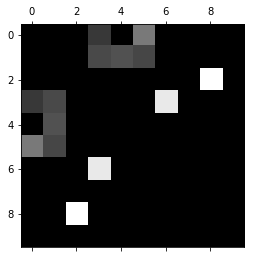

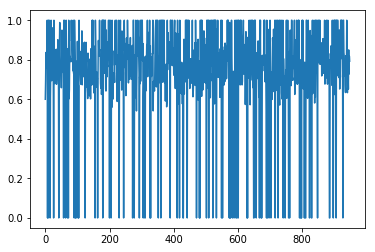

Year: 2017
max_df= 100
['2013', '2014', 'access', 'ag', 'allows', 'app', 'applications', 'best', 'blockchain', 'create', 'design', 'develop', 'developed', 'develops', 'digital', 'easy', 'field', 'financial', 'global', 'help', 'high', 'information', 'leading', 'make', 'marketing', 'medical', 'need', 'network', 'offer', 'people', 'product', 'quality', 'real', 'research', 'smart', 'social', 'solution', 'support', 'systems', 'technologies', 'unique', 'user', 'way', 'web', 'work']


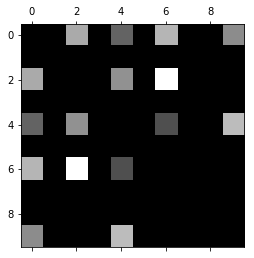

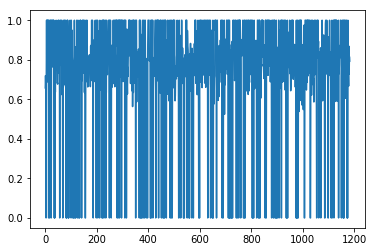

Year: 2016
max_df= 100
['2011', '2013', '2014', 'allows', 'app', 'applications', 'best', 'clients', 'cloud', 'consulting', 'create', 'develop', 'developing', 'develops', 'digital', 'easy', 'enables', 'energy', 'field', 'financial', 'global', 'health', 'help', 'innovation', 'leading', 'life', 'marketing', 'medical', 'need', 'network', 'offer', 'private', 'product', 'related', 'social', 'start', 'support', 'systems', 'technologies', 'unique', 'user', 'way', 'web', 'work', 'years']


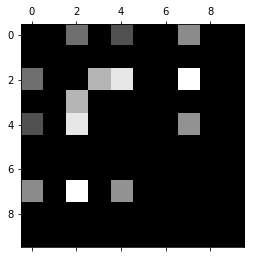

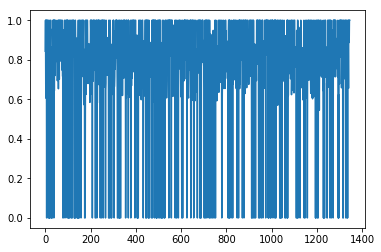

Year: 2015
max_df= 100
['2011', '2013', '2014', 'allows', 'app', 'application', 'applications', 'best', 'clients', 'cloud', 'consulting', 'create', 'customer', 'develop', 'developing', 'easy', 'energy', 'field', 'financial', 'focus', 'global', 'health', 'help', 'innovation', 'life', 'marketing', 'media', 'medical', 'needs', 'network', 'offer', 'partners', 'private', 'production', 'projects', 'related', 'social', 'start', 'technologies', 'unique', 'user', 'way', 'web', 'work', 'years']


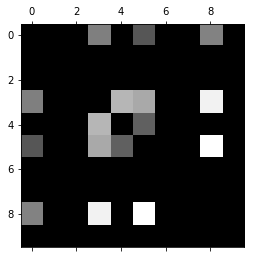

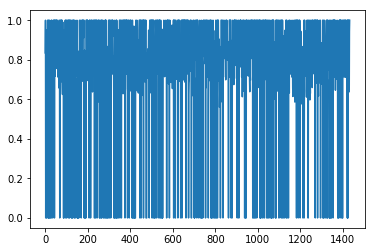

Year: 2014
max_df= 100
['2011', '2013', 'allows', 'app', 'application', 'best', 'clients', 'cloud', 'com', 'consulting', 'create', 'customer', 'developing', 'devices', 'easy', 'enables', 'energy', 'engineering', 'expertise', 'focus', 'global', 'health', 'help', 'innovation', 'life', 'marketing', 'media', 'medical', 'needs', 'network', 'offer', 'partners', 'private', 'production', 'projects', 'related', 'social', 'spin', 'start', 'support', 'unique', 'way', 'web', 'work', 'years']


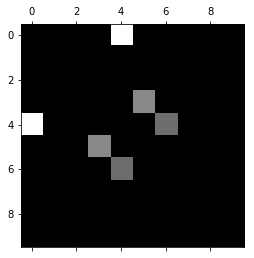

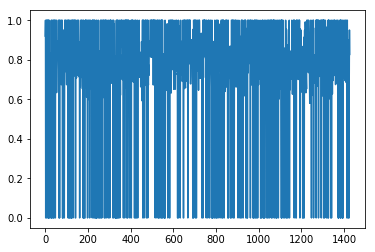

Year: 2013
max_df= 100
['2011', '2013', 'access', 'allows', 'application', 'best', 'clients', 'com', 'consulting', 'create', 'customer', 'devices', 'digital', 'energy', 'engineering', 'expertise', 'focus', 'global', 'health', 'help', 'innovation', 'leading', 'life', 'make', 'marketing', 'media', 'medical', 'needs', 'offer', 'partners', 'people', 'private', 'production', 'projects', 'purpose', 'real', 'related', 'social', 'spin', 'start', 'unique', 'way', 'web', 'work', 'years']


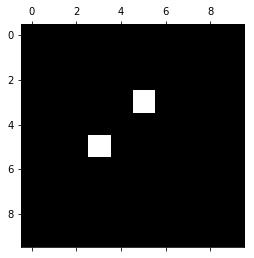

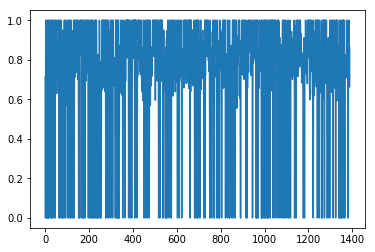

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

similarity_matrices = dict()

for y in award_years:
    print("Year: " + str(y))
    
    vect = TfidfVectorizer('content',strip_accents='unicode',ngram_range=(1,3),stop_words='english',max_features=45,max_df=100)
    mat = vect.fit_transform([c['description'] for c in js[str(y)] if c['description'] is not None])
    print('max_df=',100)
    print(vect.get_feature_names())
    """
    vect = TfidfVectorizer(stop_words='english',ngram_range=(1,3))
    mat = vect.fit_transform([c['description'] for c in js[str(y)] if c['description'] is not None])
    print(mat.shape)
    """
    S = cosine_similarity(mat,mat)
    for i in range(S.shape[0]):
        S[i,i] = 0

    plt.matshow(S[:10,:10],cmap='gray',vmin=0)
    plt.show()
    maxima = np.amax(S,axis=1)
    plt.plot(maxima)
    plt.show()
    similarity_matrices[str(y)]=S

(1389, 123773)


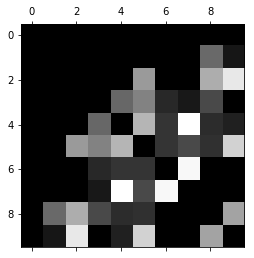

In [56]:
print(mat.shape)

S = cosine_similarity(mat,mat)
for i in range(S.shape[0]):
    S[i,i] = 0

plt.matshow(S[:10,:10],cmap='gray',vmin=0)
plt.show()